In [1]:
#Headers and libraries that we're gonna use

%matplotlib inline

#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.validation import check_random_state #to put a global seed for random number generator

#Regressor algorithms
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [2]:
import csv
photo_names = []
photos = []

with open('training_solutions_rev1.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    i = 0
    for row in reader:
        if i > 1:
            if float(row[1]) > 0.95:
                photo_names.append(row[0])
        i += 1

print(len(photo_names))
       
import scipy.misc as scp_misc
for photo in photo_names:
    img = scp_misc.imread("images_training_rev1/"+photo+".jpg", mode="L")
    img = scp_misc.imresize(img, 25)
    photos.append(img)

894


In [30]:
a = 0
while (a < len(photos)):
    photos[a] = np.reshape(photos[a], -1)
    a += 1

In [31]:
print len(photos)
np.round(len(photos)*0.7)
n_pixels = photos[0].shape[0]
print n_pixels

894
11236


In [39]:
X_train = []
y_train = []
X_test = []
y_test = []

i = 0
while (i < np.round(800*0.7)) :
#while (i < np.round(len(photos)*0.7)) :
    photo = photos[i]
    X_train.append(photo[:int(np.ceil(0.5 * n_pixels))])
    y_train.append(photo[int(np.floor(0.5 * n_pixels)):])
    i += 1
while (i < 800) :
#while (i < len(photos)) :
    photo = photos[i]
    X_test.append(photo[:int(np.ceil(0.5 * n_pixels))])
    y_test.append(photo[int(np.floor(0.5 * n_pixels)):])
    i += 1
    
print("Photos used for training: %i " % len(X_train))    
print("Photos used for testing: %i " % len(X_test))

print("Upper part photo: %i" % len(X_train[0]))
print("Lower part photo: %i" % len(y_train[0]))

    
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=100, max_features=32, random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

Photos used for training: 560 
Photos used for testing: 240 
Upper part photo: 5618
Lower part photo: 5618


In [40]:
y_test_predict = dict()

for name, estimator in ESTIMATORS.items() :
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


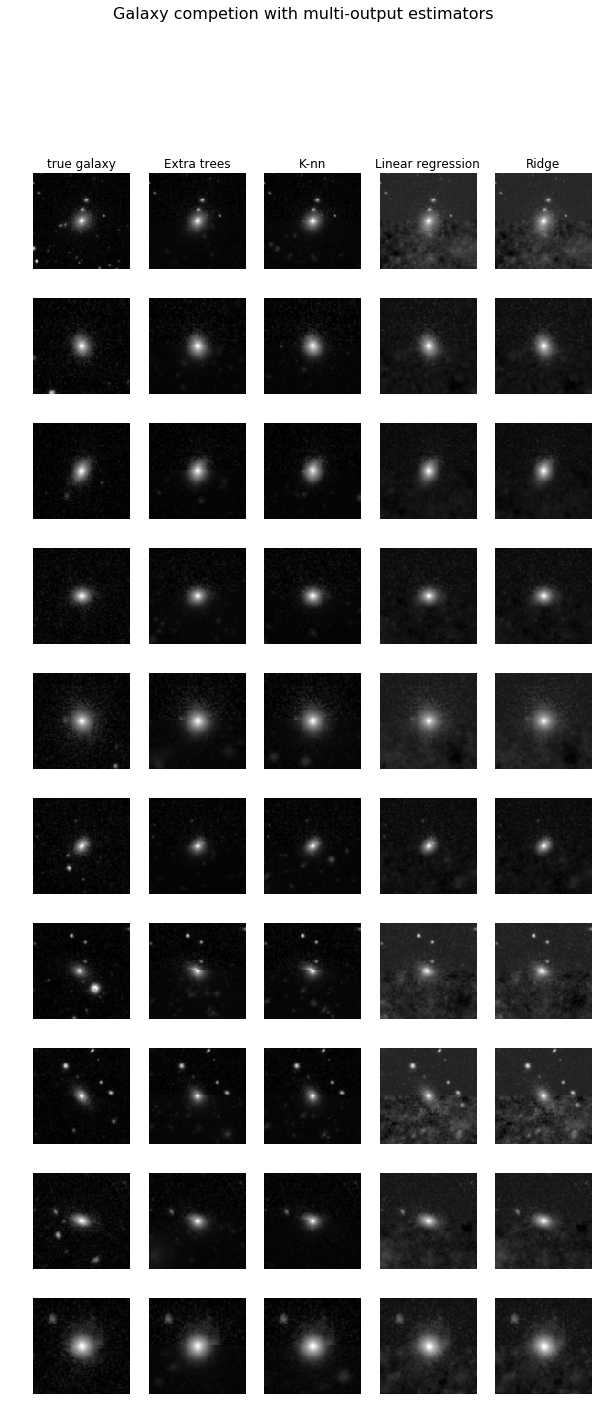

In [38]:
#Plot the completed galaxies
n_faces = 10
image_shape = (424*0.25, 424*0.25)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.*n_cols, 2.26*n_faces))
plt.suptitle("Galaxy competion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    
    if i:
        sub = plt.subplot(n_faces, n_cols, i*n_cols+1)
    else :
        sub = plt.subplot(n_faces, n_cols, i*n_cols+1, title="true galaxy")
        
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
              cmap=plt.cm.gray,
              interpolation="nearest")
    
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        
        
        if i :
            sub = plt.subplot(n_faces, n_cols, i*n_cols+2+j)
        else :
            sub = plt.subplot(n_faces, n_cols, i*n_cols+2+j, title=est)
            
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                  cmap=plt.cm.gray,
                  interpolation="nearest")
        
plt.show()